In [52]:
# Import Python Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go
#filter warnings
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 8})

In [53]:
nba_data = pd.read_csv('nbadata.csv')
nba_data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [54]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [55]:
import matplotlib.pyplot as plt

nba_filter = nba_data[['team_id', 'pts', 'elo_i', 'elo_n', 'game_location', 'game_result']]

nba_filter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   team_id        126314 non-null  object 
 1   pts            126314 non-null  int64  
 2   elo_i          126314 non-null  float64
 3   elo_n          126314 non-null  float64
 4   game_location  126314 non-null  object 
 5   game_result    126314 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.8+ MB


In [56]:
nba_filter

,team_id,pts,elo_i,elo_n,game_location,game_result
0,TRH,66,1300.0000,1293.2767,H,L
1,NYK,68,1300.0000,1306.7233,A,W
2,CHS,63,1300.0000,1309.6521,H,W
3,NYK,47,1306.7233,1297.0712,A,L
4,DTF,33,1300.0000,1279.6189,H,L
...,...,...,...,...,...,...
126309,CLE,82,1723.4149,1704.3949,H,L
126310,GSW,104,1809.9791,1813.6349,H,W
126311,CLE,91,1704.3949,1700.7391,A,L
126312,CLE,97,1700.7391,1692.0859,H,L


In [57]:
nba_filter['game_location'].unique()

array(['H', 'A', 'N'], dtype=object)

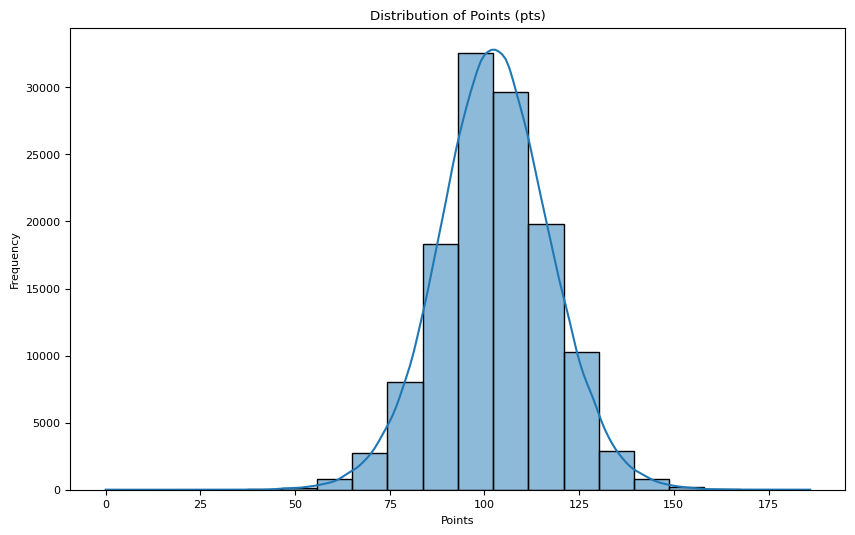

In [58]:
# Histogram of 'pts'
plt.figure(figsize=(10, 6))
sns.histplot(nba_filter['pts'], bins=20, kde=True)
plt.title('Distribution of Points (pts)')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

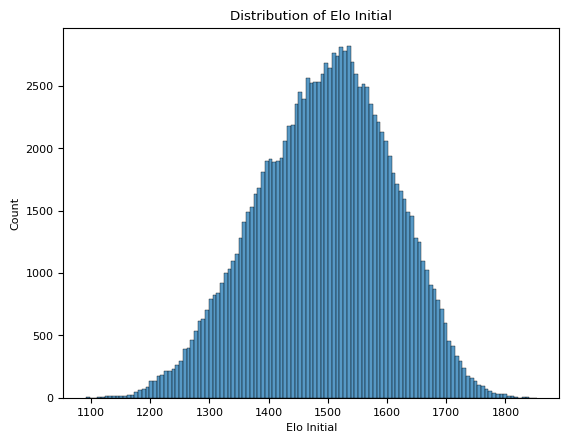

In [59]:
sns.histplot(data=nba_filter, x='elo_i')
plt.xlabel('Elo Initial')
plt.title('Distribution of Elo Initial')
plt.show()

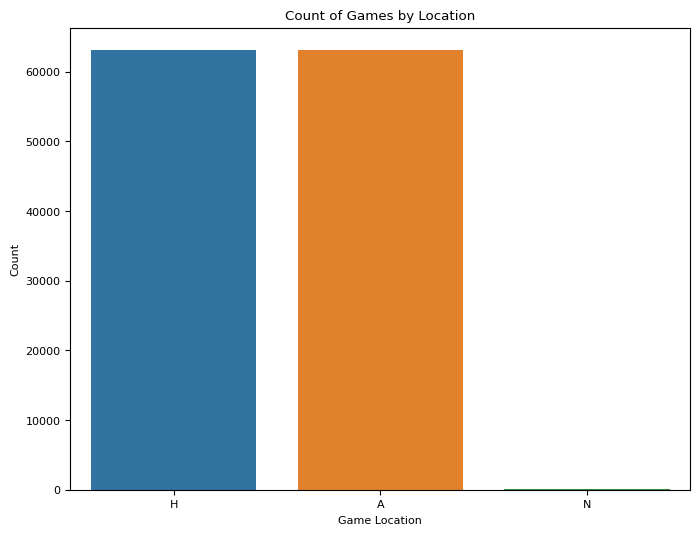

In [60]:
# Count plot of 'game_location'
plt.figure(figsize=(8, 6))
sns.countplot(x='game_location', data=nba_filter)
plt.title('Count of Games by Location')
plt.xlabel('Game Location')
plt.ylabel('Count')
plt.show()

### Removing the game location with least values

In [61]:
nba_filter = nba_filter[nba_filter['game_location'] != 'N']

In [62]:
nba_filter['game_location'].unique()

array(['H', 'A'], dtype=object)

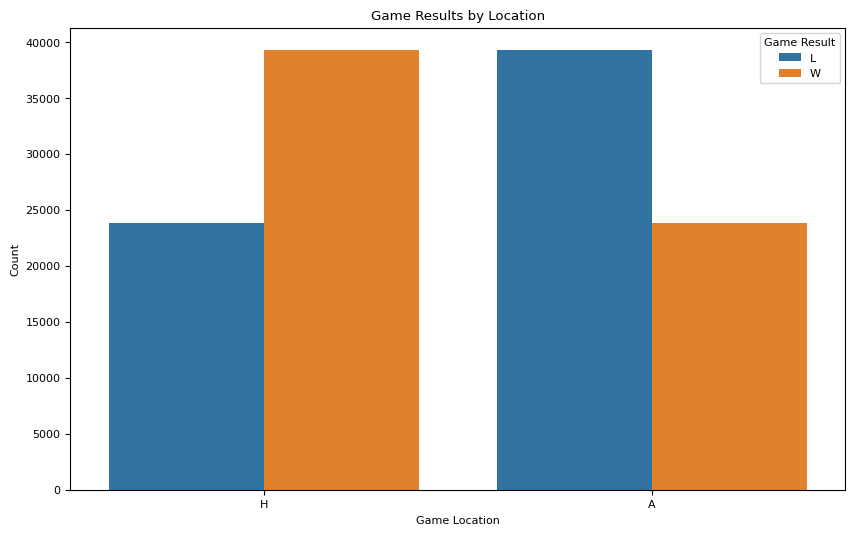

In [63]:
# Create a grouped bar plot for 'game_location' vs 'game_result'
plt.figure(figsize=(10, 6))
sns.countplot(x='game_location', hue='game_result', data=nba_filter)
plt.title('Game Results by Location')
plt.xlabel('Game Location')
plt.ylabel('Count')
plt.legend(title='Game Result')
plt.show()

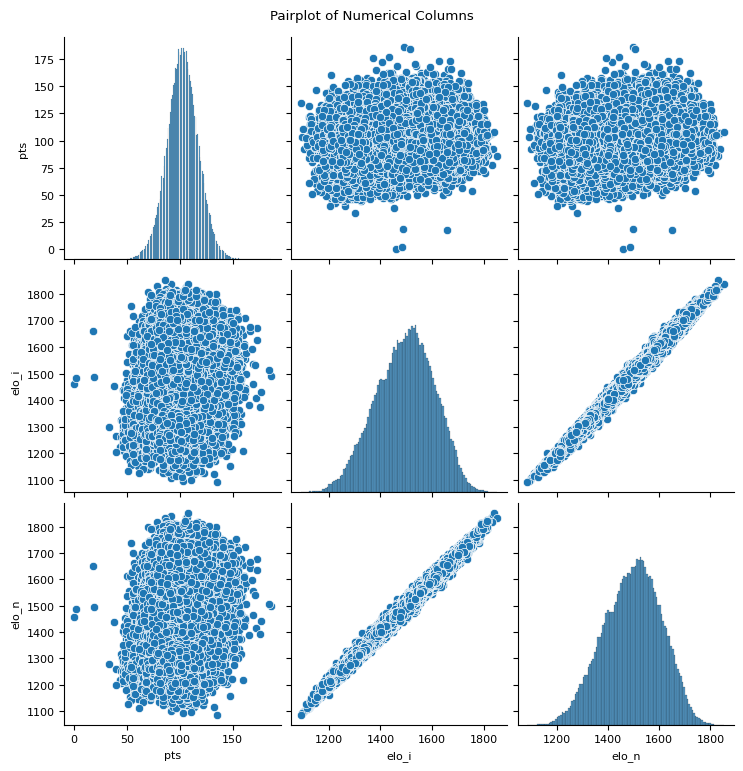

In [64]:
# Visualization 5: Pairplot for numerical columns
numerical_columns = ['pts', 'elo_i', 'elo_n']
sns.pairplot(nba_filter[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

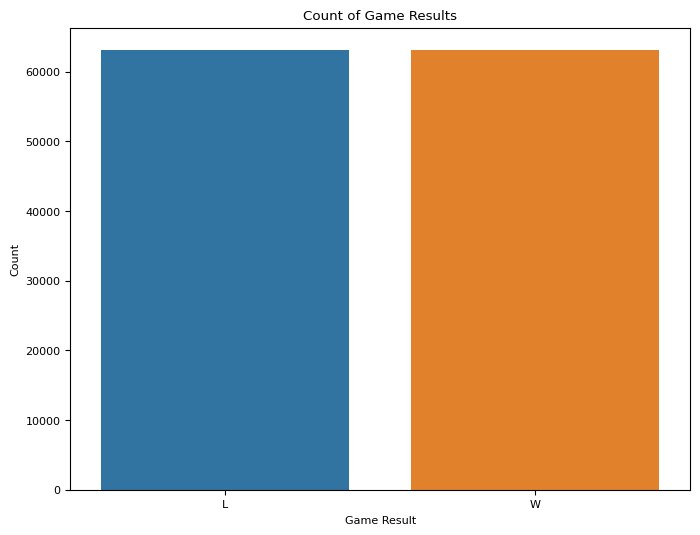

In [65]:
# Visualization 4: Count plot of 'game_result'
plt.figure(figsize=(8, 6))
sns.countplot(x='game_result', data=nba_filter)
plt.title('Count of Game Results')
plt.xlabel('Game Result')
plt.ylabel('Count')
plt.show()

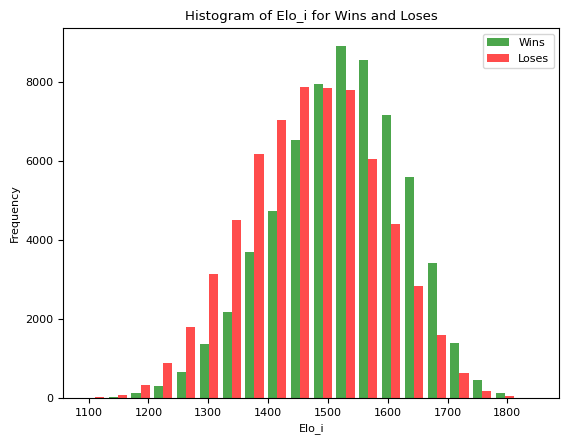

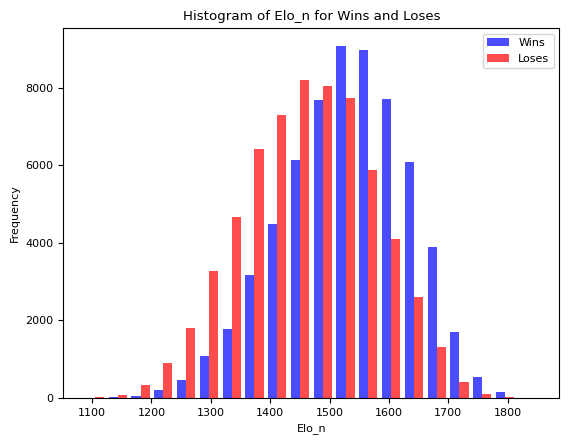

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the nbadata set
# If not, load your data into a DataFrame using pandas

# Filter data for wins and loses
wins = nba_filter[nba_filter['game_result'] == 'W']['elo_i']
loses = nba_filter[nba_filter['game_result'] == 'L']['elo_i']

# Create a histogram
plt.hist([wins, loses], bins=20, alpha=0.7, color=['green', 'red'], label=['Wins', 'Loses'])

# Add labels and title
plt.xlabel('Elo_i')
plt.ylabel('Frequency')
plt.title('Histogram of Elo_i for Wins and Loses')
plt.legend()

# Show the plot
plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the nbadata set
# If not, load your data into a DataFrame using pandas

# Filter data for wins and loses
wins = nba_filter[nba_filter['game_result'] == 'W']['elo_n']
loses = nba_filter[nba_filter['game_result'] == 'L']['elo_n']

# Create a histogram
plt.hist([wins, loses], bins=20, alpha=0.7, color=['blue', 'red'], label=['Wins', 'Loses'])

# Add labels and title
plt.xlabel('Elo_n')
plt.ylabel('Frequency')
plt.title('Histogram of Elo_n for Wins and Loses')
plt.legend()

# Show the plot
plt.show()


Modeling

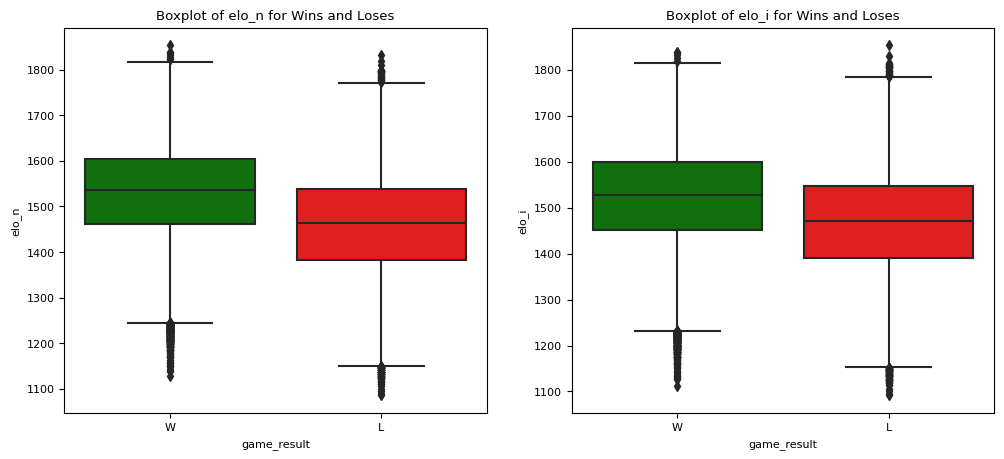

In [67]:

# Filter data for wins and losses
wins = nba_filter[nba_filter['game_result'] == 'W']
loses = nba_filter[nba_filter['game_result'] == 'L']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for elo_n
sns.boxplot(x='game_result', y='elo_n', data=pd.concat([wins, loses]), ax=axes[0], palette={"W": "green", "L": "red"})
axes[0].set_title('Boxplot of elo_n for Wins and Loses')

# Boxplot for elo_i
sns.boxplot(x='game_result', y='elo_i', data=pd.concat([wins, loses]), ax=axes[1], palette={"W": "green", "L": "red"})
axes[1].set_title('Boxplot of elo_i for Wins and Loses')

# Show the plots
plt.show()


### Encoding the string data to numeric data using Label Encoding method

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

data = nba_filter

data['team_id'] = label_encoder.fit_transform(data['team_id'])
data['game_location'] = label_encoder.fit_transform(data['game_location'])
data['game_result'] = label_encoder.fit_transform(data['game_result'])

In [69]:
# Descriptive statistics
print(nba_filter.describe())

             team_id            pts          elo_i          elo_n  \
count  126276.000000  126276.000000  126276.000000  126276.000000   
mean       47.297903     102.729505    1495.240985    1495.240985   
std        28.765553      14.815186     112.143619     112.464655   
min         0.000000       0.000000    1091.644500    1085.774400   
25%        22.000000      93.000000    1417.238325    1417.006525   
50%        44.000000     103.000000    1500.948350    1500.961350   
75%        69.000000     112.000000    1576.065800    1576.295050   
max       103.000000     186.000000    1853.104500    1853.104500   

       game_location    game_result  
count  126276.000000  126276.000000  
mean        0.500000       0.500000  
std         0.500002       0.500002  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.500000       0.500000  
75%         1.000000       1.000000  
max         1.000000       1.000000  


In [70]:
data = nba_filter
# Machine Learning Model
# Assuming 'game_results' is a binary variable indicating win/lose
X = data.drop('game_result', axis=1)
y = data['game_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

In [71]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9824596135571745
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12691
           1       0.98      0.98      0.98     12565

    accuracy                           0.98     25256
   macro avg       0.98      0.98      0.98     25256
weighted avg       0.98      0.98      0.98     25256



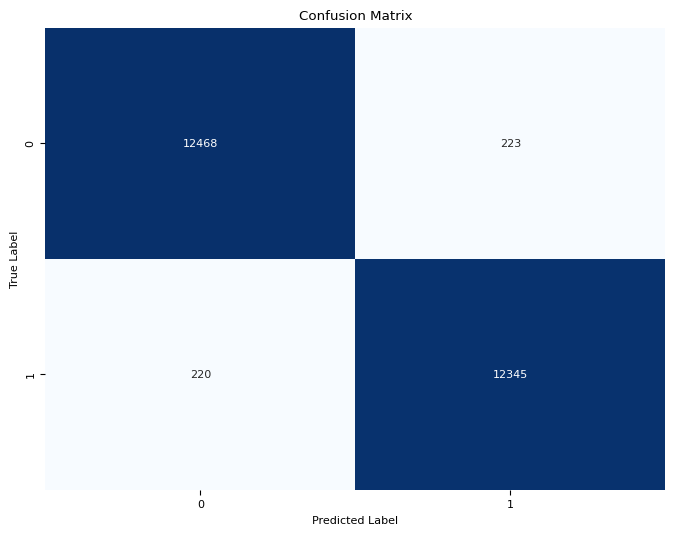

In [72]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hypothesis based on the WIN or LOSE as per the game location HOME or AWAY

Null Hypothesis (H0): There is no significant association between the game location and the game result; the probability of winning or losing is the same for both home and away games.

Alternative Hypothesis (H1): There is a significant association between the game location and the game result; the probability of winning or losing is different for home and away games.

H0: $P(W|H) = P(W|A)$ and $P(L|H) = P(L|A) $

H1: At least one of the probabilities is different

In [73]:
# Create a contingency table
contingency_table = pd.crosstab(data['game_location'], data['game_result'])


In [74]:
from scipy.stats import chi2_contingency
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 7581.8632519243565
P-value: 0.0


In [75]:
# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between game location and game result.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between game location and game result.")

Reject the null hypothesis. There is a significant association between game location and game result.


### For the relationship between elo_i (initial Elo rating) and elo_n (updated Elo rating) in classifying game_result, you can set up the following hypothesis:

Null Hypothesis (H0): There is no significant association between the difference in Elo ratings (elo_n - elo_i) and the game result; the probability of winning or losing is the same regardless of changes in Elo rating.

Alternative Hypothesis (H1): There is a significant association between the difference in Elo ratings (elo_n - elo_i) and the game result; the probability of winning or losing is influenced by changes in Elo rating.

H0: $P(\text{Win | } \text{elo_n} - \text{elo_i}) = P(\text{Win | } \text{elo_n} - \text{elo_i}) and P(\text{Loss | } \text{elo_n} - \text{elo_i}) = P(\text{Loss | } \text{elo_n} - \text{elo_i})$

H1: At least one of the probabilities is different

In [76]:
import statsmodels.api as sm

# Create a new variable for the difference in Elo ratings
data['elo_diff'] = data['elo_n'] - data['elo_i']


# Perform logistic regression
X = sm.add_constant(data['elo_diff'])
y = data['game_result']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Output the results
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            game_result   No. Observations:               126276
Model:                          Logit   Df Residuals:                   126274
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Nov 2023   Pseudo R-squ.:                   1.000
Time:                        20:20:30   Log-Likelihood:            -0.00082235
converged:                      False   LL-Null:                       -87528.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002     34.881   5.39e-06      1.000     -68.365      68.366
elo_diff      52.9432    224.915      0.235      0.814    -387.88

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### MOdel interpretation

- Coefficients:

const: The intercept term is 0.0002. However, the large standard error and the fact that the p-value is 1.000 suggest that the intercept is not statistically significant.
elo_diff: The coefficient for elo_diff is 52.9432. This represents the log-odds ratio associated with a one-unit increase in elo_diff. The large standard error and a p-value of 0.814 indicate that this coefficient is not statistically significant.

- Likelihood Ratio Test:

The likelihood ratio test (LLR p-value) compares the fit of the model with predictors to a null model with no predictors. A low p-value (close to 0) indicates that the model with predictors is a better fit than the null model.

- Hypothesis Testing:

The p-values associated with the coefficients (P>|z|) test the null hypothesis that each coefficient is equal to zero. In this case, neither the intercept nor the elo_diff coefficient is statistically significant because their p-values are very high.